  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once a month    Male  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   y

c:\Users\Sowmiya\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Sowmiya\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\Sowmiya\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Sowmiya\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", l

        Age  yummy_Yes  convenient_Yes  spicy_Yes  fattening_Yes  greasy_Yes  \
0 -0.128598   0.629598        0.230920  -0.047189      -0.127331   -0.254804   
1 -0.466096   0.665183        0.233248   0.030467      -0.129202   -0.148609   
2  0.376716  -1.066028       -1.477674  -0.049794       0.191615    0.507041   
3  0.307883  -0.783865        0.154530   0.059259       0.164724    0.209744   

   fast_Yes  cheap_Yes  tasty_Yes  expensive_Yes  ...   Like_-4    Like_0  \
0  0.108910   0.078063   0.568826      -0.106733  ... -0.218242 -0.232593   
1  0.097163   0.220244   0.551305      -0.083148  ... -0.226660 -0.285642   
2 -0.590685  -0.391680  -1.180317       0.432002  ...  0.297470 -0.345172   
3  0.038563  -0.081481  -0.589426       0.013295  ...  0.298063  0.611065   

   Like_I hate it!-5  Like_I love it!+5  VisitFrequency_More than once a week  \
0          -0.329949          -0.050130                             -0.196466   
1          -0.341809           0.820266            

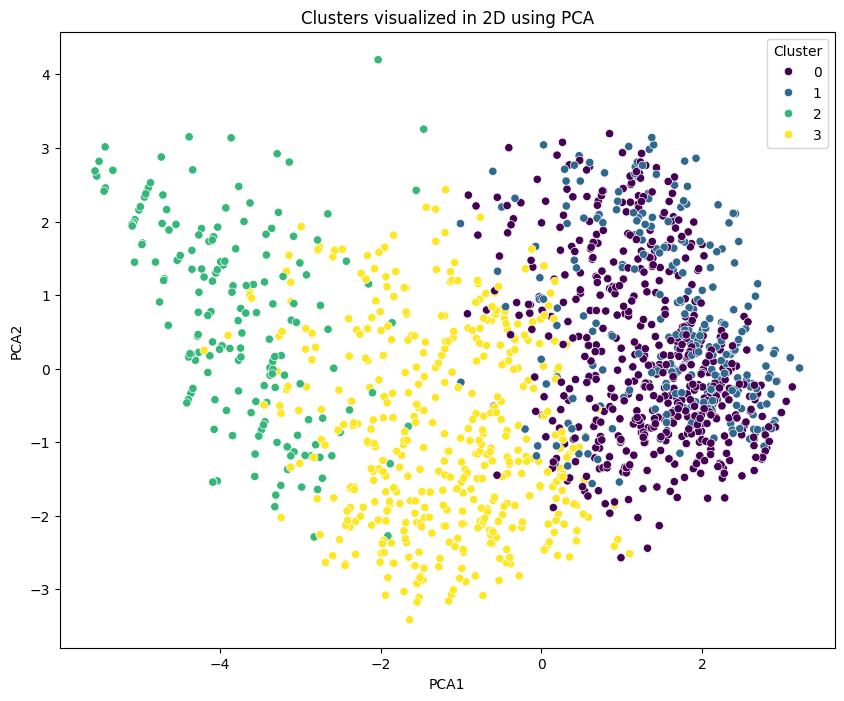

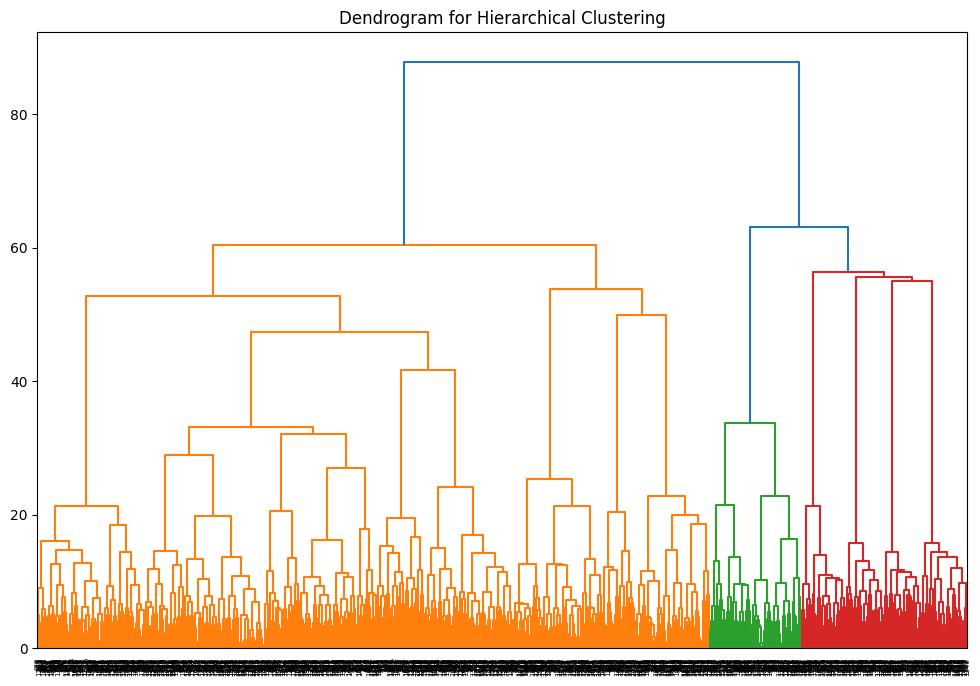

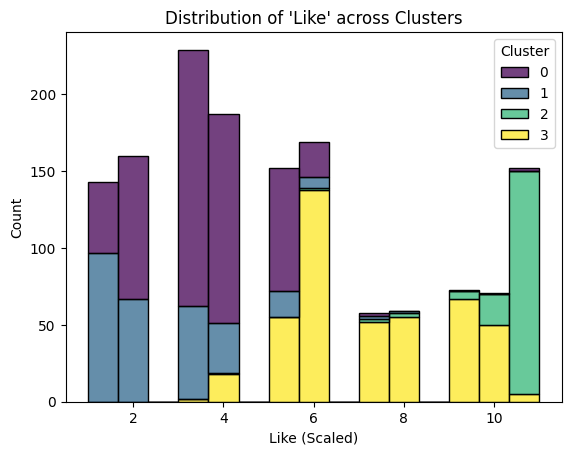

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# Load the dataset
mcdonalds = pd.read_csv("mcdonalds.csv")

# Inspect the data
print(mcdonalds.head())
print(mcdonalds.info())

# Check for missing values
print(mcdonalds.isnull().sum())

# Convert categorical variables to numerical using one-hot encoding
categorical_columns = mcdonalds.select_dtypes(include=['object']).columns
mcdonalds_encoded = pd.get_dummies(mcdonalds, columns=categorical_columns, drop_first=True)

# Standardize the data
scaler = StandardScaler()
mcdonalds_scaled = scaler.fit_transform(mcdonalds_encoded)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
mcdonalds['Cluster'] = kmeans.fit_predict(mcdonalds_scaled)

# Visualize cluster centers
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=mcdonalds_encoded.columns)
print(cluster_centers)

# Reduce dimensionality for visualization using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(mcdonalds_scaled)
mcdonalds['PCA1'] = pca_result[:, 0]
mcdonalds['PCA2'] = pca_result[:, 1]

# Scatter plot of clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=mcdonalds, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.title("Clusters visualized in 2D using PCA")
plt.show()

# Hierarchical clustering
dendro_data = linkage(mcdonalds_scaled, method='ward')
plt.figure(figsize=(12, 8))
dendrogram(dendro_data)
plt.title("Dendrogram for Hierarchical Clustering")
plt.show()

# Mosaic plot for clusters and the "Like" variable
# Handle the "Like" column with additional parsing logic
def parse_like(value):
    if isinstance(value, str) and "!" in value:
        # Extract the numeric part after the exclamation mark
        num = value.split("!")[-1]
        try:
            return int(num)
        except ValueError:
            return None
    try:
        return int(value)  # Handle numeric values directly
    except ValueError:
        return None

# Apply the parsing function and compute Like_Num
like_mapped = mcdonalds['Like'].apply(parse_like)
mcdonalds['Like_Num'] = 6 - like_mapped  # Convert to the required scale

# Visualize the relationship between "Like" and clusters
sns.histplot(data=mcdonalds, x='Like_Num', hue='Cluster', multiple='stack', palette='viridis')
plt.title("Distribution of 'Like' across Clusters")
plt.xlabel("Like (Scaled)")
plt.ylabel("Count")
plt.show()
